# Titanic Classification

Titanic veri seti, 1912 yılında batan Titanic gemisindeki yolcuların bilgilerini içerir. Bu projede amaç, yolcunun hayatta kalıp kalmadığını tahmin eden bir makine öğrenmesi modeli geliştirmektir. Model, yaş, cinsiyet, bilet sınıfı gibi özelliklere göre tahmin yapar.

In [7]:
import pandas as pd

In [8]:
df1=pd.read_csv('ttrain.csv')

In [9]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df2=pd.read_csv('ttest.csv')

In [11]:
df2.head()    # Survived stunu yok zaten bunu tahmin etmek istediğim için olmayacak

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Modelde x_train ve x_test aynı yapıda olmalı

In [13]:
df=pd.concat([df1,df2])   # 2 datayı birleştirdik

In [14]:
df.shape

(1309, 12)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()   # Veri tiplerini inceliyoruz

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
df.isnull().sum()   # Boş verileri inceledik

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [19]:
df.Survived.value_counts()   # Survived stununda ki verileri saydırdık

0.0    549
1.0    342
Name: Survived, dtype: int64

In [20]:
df.corr(numeric_only=True)  # Hangi stünun hangisine ne kadar etkisi var 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [21]:
# İşimize yarayilecek stünlar: Pclass Age Sex gibi stunları belirlemeliyiz burda yorum yapmamız lazım

In [22]:
# Cabin verisinde çok fazla boş veri var bunu doldurmak riskli olabilir dolayısıyla kullanmamaya karar verdik

In [23]:
import matplotlib.pyplot as plt

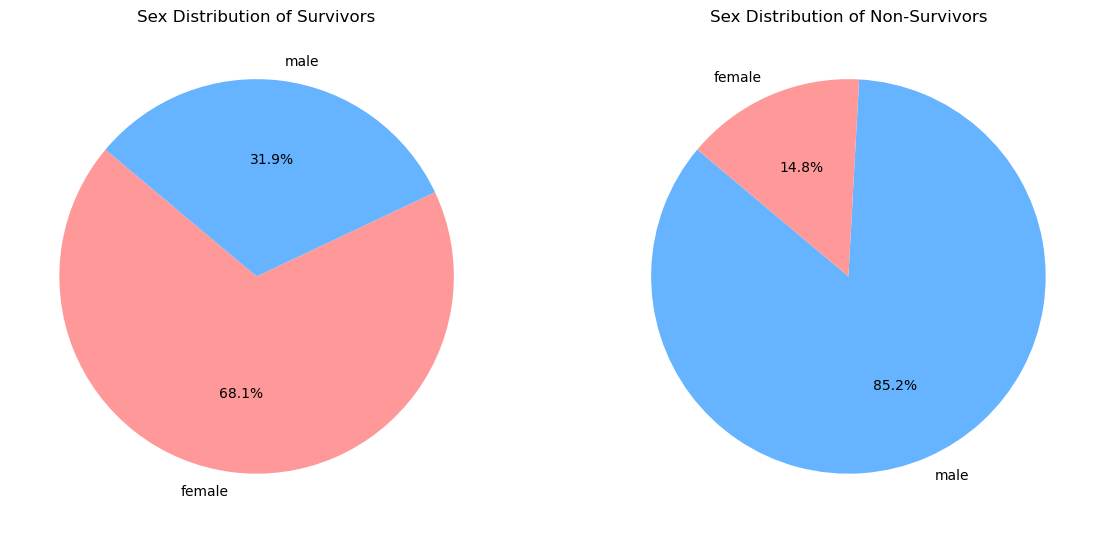

In [24]:
survived_sex_distribution=df[df['Survived']==1]['Sex'].value_counts()
not_survived_sex_distribution=df[df['Survived']==0]['Sex'].value_counts()
labels_survived=survived_sex_distribution.index
sizes_survived=survived_sex_distribution.values
labels_not_survived=not_survived_sex_distribution.index
sizes_not_survived=not_survived_sex_distribution.values
colors = ['#ff9999','#66b3ff']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
ax1.pie(sizes_survived,labels=labels_survived,autopct='%1.1f%%',colors=colors,startangle=140)
ax1.set_title('Sex Distribution of Survivors')
colors=['#66b3ff','#ff9999']
ax2.pie(sizes_not_survived,labels=labels_not_survived,autopct='%1.1f%%',colors=colors,startangle=140)
ax2.set_title('Sex Distribution of Non-Survivors')
colors=['#66b3ff','#ff9999']
plt.show()
plt.show()

In [25]:
#Fare 1 tane boş olduğu için direkt mode ile dolduracağız

In [26]:
del df['Cabin']  # Cabin stünu silindi

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [29]:
df['Fare'].value_counts()    # Hangi veriden ne kadar var onu gösteriyor

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

In [30]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())   # Boş veriyi fillna ile Fare'in mean i ile dolduruyoruz

In [31]:
df.isnull().sum()   # Kontrol ederek devam ediyoruz

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [32]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [33]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])   # 0 yazarak S i seçmiş olduk 1 desek C olacaktı 

In [34]:
df.isnull().sum()   # Embarked kısmını kontrol ettik

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [35]:
# Name kısmından Mr MSS kısmını çekeceğiz

In [36]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)    # Yeni bir Title adında stün oluşturuyoruz Boşluktan sonra ki A Z harfleri al \. ya kadar

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [38]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [39]:
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')   # Erkekleri Mr içine atadık

In [40]:
df['Title'].value_counts()

Mr          783
Miss        260
Mrs         197
Master       61
Ms            2
Mlle          2
Mme           1
Lady          1
Countess      1
Dona          1
Name: Title, dtype: int64

In [41]:
df['Title']=df['Title'].replace(['Lady','Countess','Dona','Mme'],'Mrs')

In [42]:
df['Title'].value_counts()

Mr        783
Miss      260
Mrs       201
Master     61
Ms          2
Mlle        2
Name: Title, dtype: int64

In [43]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')

In [44]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [45]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))  
# Age stünunu Title dakilerin Age lerinin meanlarına göre grupladık
# fillna doldurma fonksiyonu Title stünunun yaş ortalamasını aldık ve boşluklara grupladıklarımızın boş stunlarına ortalamalarını yazdık

In [46]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [48]:
del df['Name']
del df['Ticket']
del df['Embarked']

In [49]:
df=pd.get_dummies(df,drop_first=True)   
# Modele boş veri ve object veremem mesela Sex Male ve Female yani object veri bunları 1-0 şeklinde sayısal verieye çeviriyoruz

In [50]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,1
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1,0


In [51]:
train=df[:891]
test=df[891:]   # Bu şekilde 2 ye bölmüş olduk tekrardan

In [52]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,1,0,1,0
1,893,NaN,3,47.0,1,0,7.0000,0,0,0,1
2,894,NaN,2,62.0,0,0,9.6875,1,0,1,0
3,895,NaN,3,27.0,0,0,8.6625,1,0,1,0
4,896,NaN,3,22.0,1,1,12.2875,0,0,0,1


In [53]:
test.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
413,1305,NaN,3,32.811056,0,0,8.0500,1,0,1,0
414,1306,NaN,1,39.000000,0,0,108.9000,0,0,0,1
415,1307,NaN,3,38.500000,0,0,7.2500,1,0,1,0
416,1308,NaN,3,32.811056,0,0,8.0500,1,0,1,0
417,1309,NaN,3,5.482642,1,1,22.3583,1,0,0,0


In [54]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,1
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1,0


In [55]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
886,887,0.0,2,27.000000,0,0,13.00,1,0,1,0
887,888,1.0,1,19.000000,0,0,30.00,0,1,0,0
888,889,0.0,3,21.824366,1,2,23.45,0,1,0,0
889,890,1.0,1,26.000000,0,0,30.00,1,0,1,0
890,891,0.0,3,32.000000,0,0,7.75,1,0,1,0


In [56]:
x=train.drop(['Survived','PassengerId'],axis=1)

In [57]:
y=train[['Survived']]

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
r=RandomForestClassifier()
g=GradientBoostingClassifier()

In [60]:
import tensorflow as tf

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model=Sequential()   
model.add(Dense(120,activation='relu'))     #İlk 120 neronu bağlamış olduk,, relu veri önemliyse 1 in üstnde geliyor önemsizse es geçiyor
model.add(Dense(240,activation='relu'))     # 2. layerı oluşturuyoruz
model.add(Dense(480,activation='relu'))     # 3. layerı oluşturduk
model.add(Dense(120,activation='relu'))      # 4. layerı oluşturduk
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu')) # 5. layerı oluşturduk
model.add(Dense(1,activation='sigmoid'))    # Son layerı oluşturduk Classifaction da sonuç evet veya hayır olacağı için sigmoid kullandık
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history=model.fit(x,y, epochs=700,batch_size=32,validation_split=0.1,verbose=1)   # Verbose 0 dersek aşağıdaki sonucu göstermez

Epoch 1/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8809 - loss: 0.2569 - val_accuracy: 0.8778 - val_loss: 0.5565
Epoch 2/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8930 - loss: 0.2503 - val_accuracy: 0.8667 - val_loss: 0.5259
Epoch 3/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9224 - loss: 0.1992 - val_accuracy: 0.8556 - val_loss: 0.6139
Epoch 4/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9011 - loss: 0.2200 - val_accuracy: 0.8556 - val_loss: 0.6321
Epoch 5/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8860 - loss: 0.2663 - val_accuracy: 0.8556 - val_loss: 0.5892
Epoch 6/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9214 - loss: 0.2198 - val_accuracy: 0.8556 - val_loss: 0.6011
Epoch 7/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9148 - loss: 0.2077 - val_accuracy: 0.8556 - val_loss: 0.5993
Epoch 8/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9102 - loss: 0.2125 - val_accuracy: 0.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9104 - loss: 0.2613 - val_accuracy: 0.8444 - val_loss: 0.4985
Epoch 52/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9105 - loss: 0.2373 - val_accuracy: 0.8333 - val_loss: 0.6501
Epoch 53/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9026 - loss: 0.2340 - val_accuracy: 0.8444 - val_loss: 0.6910
Epoch 54/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8967 - loss: 0.2498 - val_accuracy: 0.8444 - val_loss: 0.7011
Epoch 55/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9039 - loss: 0.2246 - val_accuracy: 0.8444 - val_loss: 0.7648
Epoch 56/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9099 - loss: 0.2120 - val_accuracy: 0.8444 - val_loss: 0.7436
Epoch 57/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8909 - loss: 0.2439 - val_accuracy: 0.8444 - val_loss: 0.7136
Epoch 58/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9219 - loss: 0.1768 - val_accuracy: 0.8444 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9110 - loss: 0.2105 - val_accuracy: 0.8333 - val_loss: 0.6801
Epoch 102/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8977 - loss: 0.2866 - val_accuracy: 0.8444 - val_loss: 0.5584
Epoch 103/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9015 - loss: 0.2801 - val_accuracy: 0.8444 - val_loss: 0.4966
Epoch 104/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8927 - loss: 0.2601 - val_accuracy: 0.8333 - val_loss: 0.5322
Epoch 105/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8688 - loss: 0.3352 - val_accuracy: 0.8444 - val_loss: 0.4406
Epoch 106/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8915 - loss: 0.2717 - val_accuracy: 0.8556 - val_loss: 0.4425
Epoch 107/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8903 - loss: 0.2687 - val_accuracy: 0.8667 - val_loss: 0.4525
Epoch 108/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8861 - loss: 0.2654 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8861 - loss: 0.2522 - val_accuracy: 0.8333 - val_loss: 0.4954
Epoch 152/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9111 - loss: 0.2111 - val_accuracy: 0.8222 - val_loss: 0.5603
Epoch 153/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9096 - loss: 0.2060 - val_accuracy: 0.8333 - val_loss: 0.5882
Epoch 154/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9152 - loss: 0.2161 - val_accuracy: 0.8444 - val_loss: 0.5898
Epoch 155/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9097 - loss: 0.2226 - val_accuracy: 0.8556 - val_loss: 0.6127
Epoch 156/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9173 - loss: 0.2043 - val_accuracy: 0.8444 - val_loss: 0.5373
Epoch 157/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9093 - loss: 0.2095 - val_accuracy: 0.8333 - val_loss: 0.6349
Epoch 158/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9131 - loss: 0.2056 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9097 - loss: 0.2236 - val_accuracy: 0.8444 - val_loss: 0.6934
Epoch 202/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9210 - loss: 0.1879 - val_accuracy: 0.8444 - val_loss: 0.7299
Epoch 203/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8962 - loss: 0.2758 - val_accuracy: 0.8444 - val_loss: 0.6317
Epoch 204/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9163 - loss: 0.2165 - val_accuracy: 0.8444 - val_loss: 0.6759
Epoch 205/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9216 - loss: 0.2057 - val_accuracy: 0.8333 - val_loss: 0.6174
Epoch 206/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9102 - loss: 0.2057 - val_accuracy: 0.8333 - val_loss: 0.7132
Epoch 207/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9204 - loss: 0.1894 - val_accuracy: 0.8222 - val_loss: 0.7582
Epoch 208/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9098 - loss: 0.1988 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8851 - loss: 0.2521 - val_accuracy: 0.8333 - val_loss: 0.7183
Epoch 252/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9068 - loss: 0.2088 - val_accuracy: 0.8333 - val_loss: 0.7417
Epoch 253/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8994 - loss: 0.2343 - val_accuracy: 0.8222 - val_loss: 0.6662
Epoch 254/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8998 - loss: 0.2408 - val_accuracy: 0.8333 - val_loss: 0.6699
Epoch 255/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9053 - loss: 0.2267 - val_accuracy: 0.8333 - val_loss: 0.6920
Epoch 256/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9019 - loss: 0.2500 - val_accuracy: 0.8333 - val_loss: 0.6327
Epoch 257/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8998 - loss: 0.2440 - val_accuracy: 0.8222 - val_loss: 0.7152
Epoch 258/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8898 - loss: 0.2341 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9027 - loss: 0.2441 - val_accuracy: 0.8556 - val_loss: 0.4029
Epoch 302/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9075 - loss: 0.2188 - val_accuracy: 0.8444 - val_loss: 0.5227
Epoch 303/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8946 - loss: 0.2370 - val_accuracy: 0.8444 - val_loss: 0.4880
Epoch 304/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8808 - loss: 0.2567 - val_accuracy: 0.8444 - val_loss: 0.4927
Epoch 305/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9000 - loss: 0.2310 - val_accuracy: 0.8444 - val_loss: 0.5626
Epoch 306/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8968 - loss: 0.2290 - val_accuracy: 0.8444 - val_loss: 0.5994
Epoch 307/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9124 - loss: 0.2075 - val_accuracy: 0.8556 - val_loss: 0.5409
Epoch 308/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9135 - loss: 0.2052 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9010 - loss: 0.2178 - val_accuracy: 0.8333 - val_loss: 0.6011
Epoch 352/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9182 - loss: 0.1907 - val_accuracy: 0.8222 - val_loss: 0.7827
Epoch 353/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8915 - loss: 0.2258 - val_accuracy: 0.8444 - val_loss: 0.6239
Epoch 354/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8911 - loss: 0.2696 - val_accuracy: 0.8556 - val_loss: 0.5919
Epoch 355/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8879 - loss: 0.2494 - val_accuracy: 0.8333 - val_loss: 0.6630
Epoch 356/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9131 - loss: 0.2016 - val_accuracy: 0.8222 - val_loss: 0.8055
Epoch 357/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9051 - loss: 0.1894 - val_accuracy: 0.8222 - val_loss: 0.7684
Epoch 358/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9227 - loss: 0.1821 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8936 - loss: 0.2211 - val_accuracy: 0.8444 - val_loss: 0.5139
Epoch 402/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9091 - loss: 0.2024 - val_accuracy: 0.8222 - val_loss: 0.5743
Epoch 403/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9046 - loss: 0.2137 - val_accuracy: 0.8556 - val_loss: 0.5683
Epoch 404/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9143 - loss: 0.1991 - val_accuracy: 0.8444 - val_loss: 0.6637
Epoch 405/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9105 - loss: 0.1934 - val_accuracy: 0.8444 - val_loss: 0.6320
Epoch 406/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8947 - loss: 0.2646 - val_accuracy: 0.8444 - val_loss: 0.6512
Epoch 407/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8924 - loss: 0.2183 - val_accuracy: 0.8556 - val_loss: 0.5989
Epoch 408/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9084 - loss: 0.2184 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9091 - loss: 0.2162 - val_accuracy: 0.8556 - val_loss: 0.8327
Epoch 452/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8998 - loss: 0.2173 - val_accuracy: 0.8444 - val_loss: 0.7781
Epoch 453/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9117 - loss: 0.1957 - val_accuracy: 0.8444 - val_loss: 0.9534
Epoch 454/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8980 - loss: 0.2235 - val_accuracy: 0.8444 - val_loss: 0.8953
Epoch 455/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9077 - loss: 0.2160 - val_accuracy: 0.8333 - val_loss: 0.8892
Epoch 456/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9119 - loss: 0.2168 - val_accuracy: 0.8444 - val_loss: 0.8033
Epoch 457/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9018 - loss: 0.2236 - val_accuracy: 0.8556 - val_loss: 0.7358
Epoch 458/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8988 - loss: 0.2126 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9140 - loss: 0.2027 - val_accuracy: 0.8556 - val_loss: 0.7048
Epoch 502/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9016 - loss: 0.2085 - val_accuracy: 0.8444 - val_loss: 0.8730
Epoch 503/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9011 - loss: 0.2189 - val_accuracy: 0.8333 - val_loss: 1.0692
Epoch 504/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9192 - loss: 0.1902 - val_accuracy: 0.8667 - val_loss: 0.9458
Epoch 505/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9031 - loss: 0.2151 - val_accuracy: 0.8333 - val_loss: 0.8846
Epoch 506/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9079 - loss: 0.2067 - val_accuracy: 0.8444 - val_loss: 0.8855
Epoch 507/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9242 - loss: 0.1860 - val_accuracy: 0.8111 - val_loss: 1.1302
Epoch 508/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9242 - loss: 0.1698 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9155 - loss: 0.1747 - val_accuracy: 0.8556 - val_loss: 0.8945
Epoch 552/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9333 - loss: 0.1809 - val_accuracy: 0.8556 - val_loss: 0.8591
Epoch 553/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9075 - loss: 0.2078 - val_accuracy: 0.8222 - val_loss: 0.9277
Epoch 554/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8996 - loss: 0.2269 - val_accuracy: 0.8444 - val_loss: 0.8574
Epoch 555/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9033 - loss: 0.1952 - val_accuracy: 0.8333 - val_loss: 0.9036
Epoch 556/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9165 - loss: 0.1785 - val_accuracy: 0.8444 - val_loss: 0.9481
Epoch 557/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9107 - loss: 0.1994 - val_accuracy: 0.8444 - val_loss: 1.0315
Epoch 558/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8823 - loss: 0.2952 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9239 - loss: 0.1904 - val_accuracy: 0.8556 - val_loss: 0.7791
Epoch 602/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9168 - loss: 0.1797 - val_accuracy: 0.8556 - val_loss: 0.7413
Epoch 603/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9225 - loss: 0.1871 - val_accuracy: 0.8667 - val_loss: 0.8720
Epoch 604/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9218 - loss: 0.2016 - val_accuracy: 0.8556 - val_loss: 0.7584
Epoch 605/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9082 - loss: 0.2000 - val_accuracy: 0.8444 - val_loss: 0.8104
Epoch 606/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9096 - loss: 0.1897 - val_accuracy: 0.8556 - val_loss: 0.8119
Epoch 607/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9210 - loss: 0.1743 - val_accuracy: 0.8556 - val_loss: 0.8454
Epoch 608/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9176 - loss: 0.1980 - val_accuracy: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9009 - loss: 0.2238 - val_accuracy: 0.8111 - val_loss: 0.8757
Epoch 652/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9026 - loss: 0.2176 - val_accuracy: 0.8333 - val_loss: 0.9298
Epoch 653/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9047 - loss: 0.2107 - val_accuracy: 0.8222 - val_loss: 0.9718
Epoch 654/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9172 - loss: 0.1874 - val_accuracy: 0.8222 - val_loss: 0.8463
Epoch 655/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9000 - loss: 0.2133 - val_accuracy: 0.8333 - val_loss: 0.9773
Epoch 656/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9109 - loss: 0.1939 - val_accuracy: 0.8222 - val_loss: 1.0183
Epoch 657/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9273 - loss: 0.1773 - val_accuracy: 0.8333 - val_loss: 0.9479
Epoch 658/700
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9223 - loss: 0.1812 - val_accuracy: 

In [108]:
r.fit(x,y)

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_44288\2591809438.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r.fit(x,y)


RandomForestClassifier()

In [109]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,True,False,True,False
1,893,NaN,3,47.0,1,0,7.0000,False,False,False,True
2,894,NaN,2,62.0,0,0,9.6875,True,False,True,False
3,895,NaN,3,27.0,0,0,8.6625,True,False,True,False
4,896,NaN,3,22.0,1,1,12.2875,False,False,False,True


In [112]:
test=test.drop(['PassengerId','Survived'],axis=1)

In [113]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,False,True,False
1,3,47.0,1,0,7.0000,False,False,False,True
2,2,62.0,0,0,9.6875,True,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,False,True


In [118]:
tahmin=r.predict(test)    # test ve x in yapısı aynı olmalı
# Tahminleri yaptık

In [119]:
# Doğruluk oranlarına bakacağız

In [120]:
sonuc=pd.DataFrame()

In [121]:
sonuc['Survived']=tahmin

In [122]:
sonuc['PassengerId']=df2['PassengerId']

In [126]:
sonuc['Survived']=sonuc['Survived'].astype('int32')   # Sonuc floattı integera çevirdik

In [127]:
sonuc.head()

,Survived,PassengerId
0,0,892
1,0,893
2,1,894
3,1,895
4,1,896


In [128]:
sonuc.to_csv('sonuc1.csv', index=False)

In [129]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay Zeka\Day4-HW

26.07.2025  18:20    <DIR>          .
26.07.2025  07:08    <DIR>          ..
26.07.2025  15:00    <DIR>          .ipynb_checkpoints
26.07.2025  07:08             4.063 advertising.csv
26.07.2025  07:19           251.740 Advertising.ipynb
26.07.2025  18:21             3.258 sonuc1.csv
26.07.2025  18:20           144.263 Titanic_Classification.ipynb
26.07.2025  07:21            28.629 ttest.csv
26.07.2025  07:22            61.194 ttrain.csv
               6 File(s)        493.147 bytes
               3 Dir(s)  92.221.595.648 bytes free
